In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras




url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"



columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin','cname']



df = pd.read_csv(url, delim_whitespace=True, names=columns, na_values='?') 


C:\Users\tyra\AppData\Local\Temp\ipykernel_24688\761236264.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=columns, na_values='?')


In [3]:
df


 
# 결측값 처리 (horsepower 컬럼에 결측값 존재)
df = df.dropna()

In [4]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,cname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [5]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
cname           0
dtype: int64

In [6]:
df= df.drop('cname',axis=1)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [7]:
X=df.drop('mpg',axis=1)
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1


In [8]:
y = df['mpg']
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12) #X는 입력데이터(특성 혹은 특성들. 테이블의 열), y는 정답값(레이블)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(313, 7) (313,)
(79, 7) (79,)


In [10]:

#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(7,input_shape=(7,),activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

C:\Users\tyra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,257 (4.91 KB)

 Trainable params: 1,257 (4.91 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
N_EPOCHS = 50

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 161.4964 - mse: 161.4964 - val_loss: 212.3744 - val_mse: 212.3744
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 164.5709 - mse: 164.5709 - val_loss: 205.3170 - val_mse: 205.3170
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 156.5567 - mse: 156.5567 - val_loss: 198.3816 - val_mse: 198.3816
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 136.0714 - mse: 136.0714 - val_loss: 191.5647 - val_mse: 191.5647
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 150.6705 - mse: 150.6705 - val_loss: 185.0522 - val_mse: 185.0522
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 141.0134 - mse: 141.0134 - val_loss: 178.6949 - val_mse: 178.6949
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 136.1446 - mse: 136.1446 - val_loss: 172.4960 - val_mse: 172.4960
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 126.9194 - mse: 126.9194 - val_loss: 166.4815 - val_mse: 166.4815
Epoch 9/

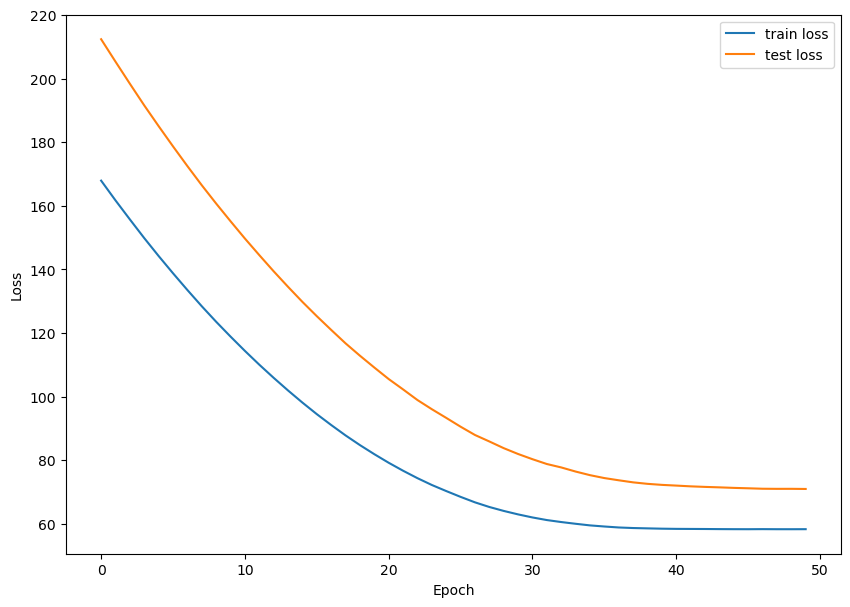

In [14]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
model.evaluate(X_test, y_test)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 66.8099 - mse: 66.8099 


[71.02214813232422, 71.02214813232422]